In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split #sklearn is used here to split the data since sklearn can be used for data analysis and maniplaion
#scikit-learn is Simple and efficient tools for data mining,maniplatutaion and data analysis

import nltk #natural language processing 
from nltk.corpus import stopwords # In natural language processing useless words (data) are referred to as stop words(as, an,the etc)
#corpus is a large and structured set of texts 
from nltk.classify import SklearnClassifier#here we wil arrange data in classes or categories according to shared qualities or characteristics.

from wordcloud import WordCloud,STOPWORDS#wordcloud is used for visual representation of text data,
#typically used to depict keyword metadata (tags) on websites, or to visualize free form text.

import matplotlib.pyplot as plt
%matplotlib inline

from subprocess import check_output#This module intends to replace several older modules and functions:

In [2]:
#To check the list of stopwords you can type the following commands in the python shell.
# import nltk
# from nltk.corpus import stopwords
#  set(stopwords.words('english'))
#below is the link to find out how to filter the stopword and how to find out how many stopwords are there
#https://www.geeksforgeeks.org/removing-stop-words-nltk-python/

In [3]:
data=pd.read_csv(r'C:\Users\asus\Downloads\zomato.csv',encoding='latin-1')
data.head()

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


In [4]:

data.columns

Index(['Restaurant ID', 'Restaurant Name', 'Country Code', 'City', 'Address',
       'Locality', 'Locality Verbose', 'Longitude', 'Latitude', 'Cuisines',
       'Average Cost for two', 'Currency', 'Has Table booking',
       'Has Online delivery', 'Is delivering now', 'Switch to order menu',
       'Price range', 'Aggregate rating', 'Rating color', 'Rating text',
       'Votes'],
      dtype='object')

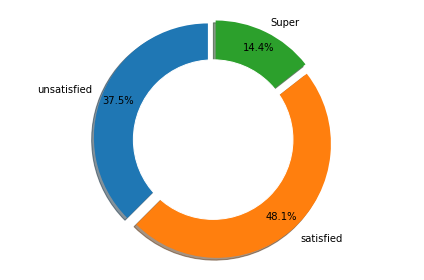

In [6]:
unsatisfied = data[data['Aggregate rating'] < 3.0]
satisfied = data[(data['Aggregate rating'] >= 3.0) & (data['Aggregate rating']< 4)]
Super = data[data['Aggregate rating'] >= 4.0]
label_names=['unsatisfied','satisfied','Super']
sizes = [unsatisfied.shape[0],satisfied.shape[0],Super.shape[0]]
# Now let's make the donut plot
explode = (0.05,0.05,0.05)
my_circle=plt.Circle((0,0),0.7,color='white')
plt.pie(sizes,labels=label_names,explode=explode,autopct='%1.1f%%',pctdistance=0.85,startangle=90,shadow=True)
fig=plt.gcf()
fig.gca().add_artist(my_circle)
plt.axis('equal')
plt.tight_layout()
plt.show()